In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.stats import spearmanr
plt.rcParams.update({"figure.dpi": 150})

In [3]:
df1 = pd.read_excel("DATASET PADST 1.xlsx")
df2 = pd.read_excel("Dataset PADST 2.xlsx")

In [4]:
def clean_cols(df):
    out = df.copy()
    out.columns = [str(c).strip().lower().replace("\n"," ").replace("\r"," ") for c in out.columns]
    return out

df1c, df2c = clean_cols(df1), clean_cols(df2)

In [5]:
df1d = df1c.iloc[1:].reset_index(drop=True)
df2d = df2c.iloc[1:].reset_index(drop=True)


In [6]:
likert_cols = sorted([c for c in df1d.columns if c.startswith("q7_")])
verbal_to_num = {
    "Not At All": 1, "A Very Little": 2, "A Little": 3,
    "Moderately": 4, "Enough": 5, "A Lot": 6, "Exactly": 7
}
for c in likert_cols:
    df1d[c] = pd.to_numeric(df1d[c], errors="coerce")
    df2d[c] = df2d[c].map(verbal_to_num).astype("float")

In [7]:
def to_age(year):
    try:
        return 2025 - int(str(year).strip())
    except:
        return np.nan
for d in (df1d, df2d):
    if "q14" in d.columns:
        d["age"] = d["q14"].apply(to_age)

In [8]:
def respondent_indices(d):
    d = d.copy()
    d["motivation_mean"] = d[likert_cols].mean(axis=1, skipna=True)
    d["motivation_std"]  = d[likert_cols].std(axis=1, ddof=0, skipna=True)
    d["motivation_range"]= d[likert_cols].max(axis=1) - d[likert_cols].min(axis=1)
    return d


In [9]:
df1h, df2h = respondent_indices(df1d), respondent_indices(df2d)

In [13]:
df1h

,q1,q12,q14,q10,q10_4_text,q16,q17,q18,q14.1,q17_1,...,q7_11,q7_12,q7_13,q7_14,q7_15,q7_16,age,motivation_mean,motivation_std,motivation_range
0,1,126,1996,1,NaN,18,5,"6,12",2,5,...,1.0,4.0,7.0,7.0,7.0,3.0,29,5.6250,1.932453,6.0
1,2,126,1996,1,NaN,12,3,10,3,5,...,4.0,1.0,5.0,6.0,4.0,1.0,29,3.8750,2.204399,6.0
2,3,126,1990,2,NaN,20,2,18,2,4,...,1.0,1.0,4.0,6.0,4.0,1.0,35,3.5625,1.902917,5.0
3,4,126,1991,1,NaN,20,6,"10,14",4,5,...,1.0,1.0,7.0,7.0,4.0,1.0,34,4.1875,2.898680,6.0
4,5,130,1998,1,NaN,24,0,NaN,2,3,...,4.0,4.0,4.0,4.0,4.0,4.0,27,3.9375,0.899218,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,208,78,1992,1,NaN,25,10,"11,17",4,5,...,1.0,1.0,6.0,7.0,5.0,1.0,33,4.6250,2.521780,6.0
208,209,14,1996,2,NaN,24,4,11,3,4,...,1.0,2.0,5.0,7.0,7.0,1.0,29,3.8125,2.185714,6.0
209,210,164,1996,2,NaN,17,1,13,2,2,...,3.0,3.0,3.0,3.0,3.0,3.0,29,3.0000,0.000000,0.0
210,211,118,1998,2,NaN,17,1,19,3,5,...,1.0,1.0,6.0,7.0,6.0,1.0,27,4.6250,2.496873,6.0


In [14]:
df2h

,q17,q12,q14,q10,q10_4_text,q16,q17.1,q18,q14.1,q17_1,...,q7_11,q7_12,q7_13,q7_14,q7_15,q7_16,age,motivation_mean,motivation_std,motivation_range
0,1,United Kingdom of Great Britain and Northern I...,1999,Female,NaN,CAH11-01\tComputing,NaN,OTHER SERVICE ACTIVITIES,NaN,Somewhat agree,...,1.0,3.0,4.0,1.0,1.0,1.0,26,3.5000,2.179449,6.0
1,2,Nigeria,1992,Male,NaN,CAH11-01\tComputing,4,FINANCIAL AND INSURANCE ACTIVITIES,I have no prior experience of formative assess...,Strongly agree,...,4.0,2.0,7.0,7.0,3.0,1.0,33,4.7500,2.015564,6.0
2,3,Nigeria,1987,Male,NaN,CAH11-01\tComputing,8,FINANCIAL AND INSURANCE ACTIVITIES,I have some experience,Strongly agree,...,5.0,1.0,7.0,7.0,5.0,1.0,38,4.8750,2.368412,6.0
3,4,Nigeria,1993,Male,NaN,"CAH24-01\tMedia, journalism and communications",6,"AGRICULTURE, FORESTRY AND FISHING,INFORMATION ...",I have some experience,Strongly agree,...,4.0,1.0,7.0,7.0,7.0,1.0,32,5.0000,2.500000,6.0
4,5,Pakistan,1996,Male,NaN,CAH11-01\tComputing,0,OTHER SERVICE ACTIVITIES,I have some experience,Strongly agree,...,7.0,7.0,7.0,7.0,7.0,7.0,29,6.8750,0.330719,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,Myanmar,1997,Female,NaN,CAH10-01\tEngineering,2,INFORMATION AND COMMUNICATION,I have no prior experience of formative assess...,Somewhat agree,...,5.0,6.0,4.0,5.0,6.0,6.0,28,4.9375,0.747391,2.0
131,132,India,1996,Male,NaN,CAH11-01\tComputing,4,"INFORMATION AND COMMUNICATION,EDUCATION",I have some experience,Strongly agree,...,1.0,1.0,7.0,7.0,7.0,1.0,29,4.5625,2.645013,6.0
132,133,India,1995,Female,NaN,CAH11-01\tComputing,NaN,EDUCATION,I have some experience,Strongly agree,...,2.0,5.0,5.0,4.0,2.0,5.0,30,4.1250,1.494783,6.0
133,134,Myanmar,2003,Female,NaN,CAH11-01\tComputing,0,NaN,I have experience of formative assessment and ...,Somewhat agree,...,4.0,1.0,6.0,6.0,4.0,1.0,22,4.3125,1.927393,6.0


In [10]:
def cohens_d(x, y):
    x, y = pd.Series(x).dropna(), pd.Series(y).dropna()
    if len(x)<2 or len(y)<2: return np.nan
    mx, my = x.mean(), y.mean()
    vx, vy = x.var(ddof=1), y.var(ddof=1)
    sp = np.sqrt(((len(x)-1)*vx + (len(y)-1)*vy)/(len(x)+len(y)-2))
    return 0.0 if sp==0 else (mx - my)/sp

rows = []
for c in likert_cols:
    rows.append({
        "item": c,
        "df1_mean": df1h[c].mean(),
        "df2_mean": df2h[c].mean(),
        "mean_diff": df2h[c].mean() - df1h[c].mean(),
        "cohens_d": cohens_d(df1h[c], df2h[c])
    })
summary = pd.DataFrame(rows).sort_values("mean_diff", ascending=False)

In [11]:
summary

,item,df1_mean,df2_mean,mean_diff,cohens_d
4,q7_13,5.402116,6.184000,0.781884,-0.607865
11,q7_5,5.053191,5.620968,0.567776,-0.395572
6,q7_15,4.756614,5.320000,0.563386,-0.283057
1,q7_10,4.737968,5.224000,0.486032,-0.251485
15,q7_9,4.824468,5.304000,0.479532,-0.300559
5,q7_14,5.862434,6.304000,0.441566,-0.371464
8,q7_2,5.734043,6.144000,0.409957,-0.331333
9,q7_3,4.788360,5.168000,0.379640,-0.193821
10,q7_4,2.223404,2.580645,0.357241,-0.194591
12,q7_6,5.889474,6.230159,0.340685,-0.301469


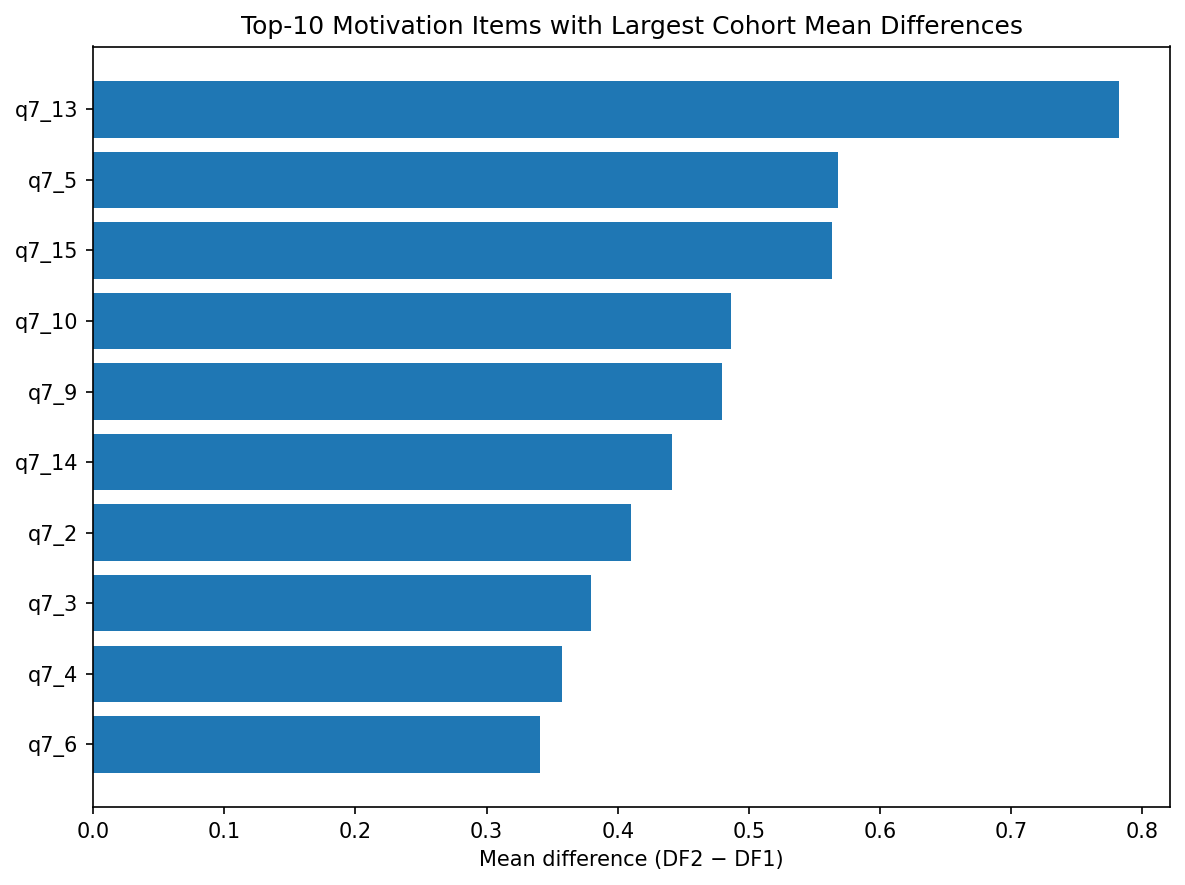

In [15]:
top = summary.head(10).sort_values("mean_diff", ascending=True)
plt.figure(figsize=(8,6))
plt.barh(top["item"], top["mean_diff"])
plt.xlabel("Mean difference (DF2 − DF1)")
plt.title("Top-10 Motivation Items with Largest Cohort Mean Differences")
plt.tight_layout()
plt.show()

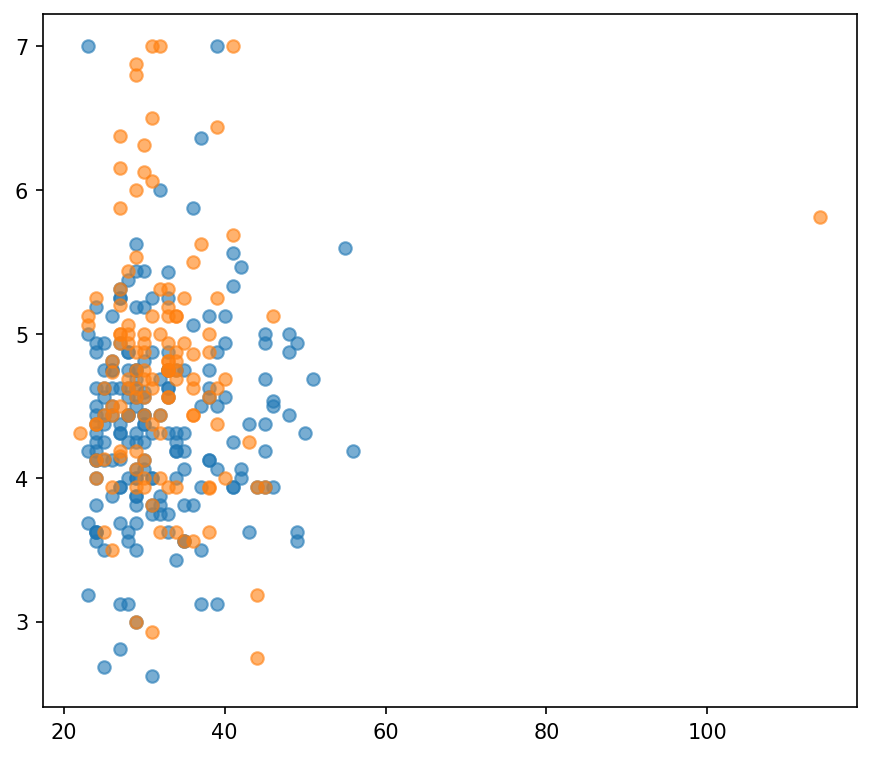

In [16]:
plt.figure(figsize=(7,6))
plt.scatter(df1h["age"], df1h["motivation_mean"], alpha=0.6, label="Dataset 1")
plt.scatter(df2h["age"], df2h["motivation_mean"], alpha=0.6, label="Dataset 2")

/tmp/ipython-input-2376129139.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


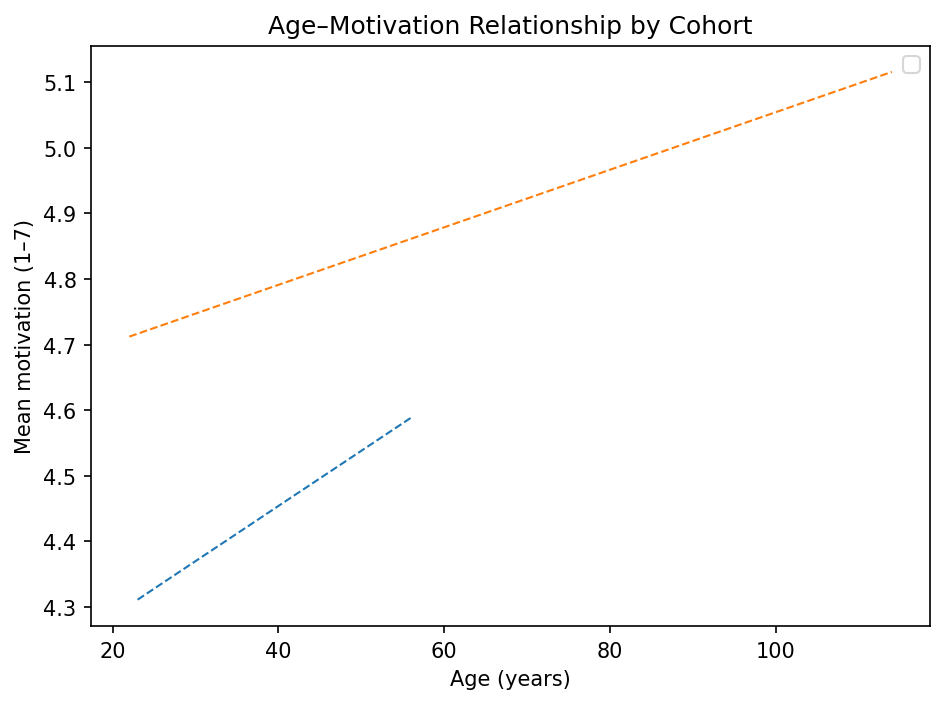

In [17]:
for label, dfx in [("Dataset 1", df1h), ("Dataset 2", df2h)]:
    x = dfx["age"].astype(float); y = dfx["motivation_mean"].astype(float)
    mask = x.notna() & y.notna()
    if mask.sum() > 2:
        m, b = np.polyfit(x[mask], y[mask], 1)
        xs = np.linspace(x[mask].min(), x[mask].max(), 100)
        plt.plot(xs, m*xs + b, linestyle="--", linewidth=1)
plt.xlabel("Age (years)")
plt.ylabel("Mean motivation (1–7)")
plt.title("Age–Motivation Relationship by Cohort")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
r1 = df1h[["age","motivation_mean"]].dropna().corr().iloc[0,1]
r2 = df2h[["age","motivation_mean"]].dropna().corr().iloc[0,1]
rho, p = spearmanr(summary["df1_mean"], summary["df2_mean"])

std_stats = pd.DataFrame({
    "cohort": ["Dataset 1","Dataset 2"],
    "mean_std": [df1h["motivation_std"].mean(), df2h["motivation_std"].mean()],
    "median_std": [df1h["motivation_std"].median(), df2h["motivation_std"].median()]
})

In [19]:
print("Pearson r (age vs motivation): DF1=", r1, " DF2=", r2)
print("Spearman rho (item priority alignment DF1 vs DF2):", rho, "p=", p)
print(std_stats)


Pearson r (age vs motivation): DF1= 0.09069375258028466  DF2= 0.04703324232497864
Spearman rho (item priority alignment DF1 vs DF2): 0.9705882352941176 p= 4.723401127287032e-10
      cohort  mean_std  median_std
0  Dataset 1  1.937794    1.975435
1  Dataset 2  1.983848    2.233883


In [20]:
harmonized = pd.concat([
    df1h.assign(cohort="Dataset 1")[["cohort","age","motivation_mean","motivation_std","motivation_range"] + likert_cols],
    df2h.assign(cohort="Dataset 2")[["cohort","age","motivation_mean","motivation_std","motivation_range"] + likert_cols]
], ignore_index=True)
harmonized.to_csv("harmonized_motivation_data.csv", index=False)
print("Saved harmonized_motivation_data.csv")

Saved harmonized_motivation_data.csv
